<a href="https://colab.research.google.com/github/Derwuel/Entrega_monopolio/blob/main/TP1/practicaMono01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis de base de datos monopolio:

En la siguiente ejercicio se tratara de analizar algunos datos de una bases de datos especializada en monopolio, en concreto se tratará de analizar algunas características de los usuarios como: 'Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',  'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', con el fin de poder determinar cual es el tipo de persona que mas consume los productos del juego monopolio.

1.- Primera parte: esta parte del código nos permite obtener las librerías adecuadas para poder realizar el análisis de los datos.

In [ ]:
%matplotlib inline
!pip install wquantiles
!pip install openpyxl
!pip install opendatasets

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import opendatasets as od
import wquantiles
import os

from pathlib import Path
from scipy.stats import trim_mean
from statsmodels import robust
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.impute import KNNImputer

2.- Con esta parte del código se puede obtener la base de datos, a través de una API, esta base de datos está almacenada en la página kaggel y a través de un nombre de usuario y de una contraseña se puede acceder a los datos desde cualquier lugar.

Estos son los datos nesesarios para consumir la API y poder acceder a la base de datos

1.   "username":"derwuel"
2.   "key":"86b1d6a83dda1f96e18580fbd03a5544"



In [ ]:
#este es el codigo nesesario para poder usar la base de datos desde  kaggel
dataset_link="https://www.kaggle.com/datasets/derwuel/trabajo-mono"
od.download(dataset_link)
#aqui estamos cargando la base de datos para que despues podamos usarla de mejor manera
os.chdir("trabajo-mono")
os.listdir()
name="Base_clientes_Monopoly-0_prueba.xlsx"
df = pd.read_excel(name)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: derwuel
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/derwuel/trabajo-mono


100%|██████████| 116M/116M [00:01<00:00, 108MB/s]


3.- en esta parte del código comienza la limpieza de los datos, esto se hace con el fin de poder trabajar de manera más cómoda con ellos, en este caso procederemos a cambiar los datos del index, por los nombres de las columnas con el fin de identificarlos mejor y luego eliminaremos la primera fila de las columnas, ya que el index a tomado el valor de la primera fila, esta ya no es necesaria , luego tomaremos los datos de  la columna ‘sexo’ y los remplasaremos para que sea mas facil de trabajar al momento de realizar el analicis.

In [ ]:
#estos son los códigos que utilizaremos para hacer el primer sondeo de los datos
primeras_columnas = df.columns[:60]
valores_segunda_fila = df.iloc[0, :60]
print(f"Nombres de las columnas: {primeras_columnas}")
print(f"Valores de la segunda fila: {valores_segunda_fila}")

# Cambiar los nombres de las columnas por los valores de la fila 0
df.columns = df.iloc[0]

# Eliminar la fila 0 ya que ahora es innecesaria (contiene los nuevos nombres de columnas)
df = df.drop(df.index[0])

#este parte del codigo existe para poder trasformar los datos de tipo str a datos numericos
df['Sexo'] = df['Sexo'].replace({'H': 1, 'M': 2})

Nombres de las columnas: Index([     1,  '1.1',  '1.2',  '1.3',  '1.4',  '1.5',  '1.6',  '1.7',  '1.8',
        '1.9', '1.10', '1.11', '1.12', '1.13', '1.14', '1.15', '1.16', '1.17',
       '1.18', '1.19', '1.20', '1.21', '1.22', '1.23', '1.24', '1.25', '1.26',
       '1.27', '1.28', '1.29', '1.30', '1.31', '1.32', '1.33', '1.34', '1.35',
       '1.36', '1.37', '1.38', '1.39', '1.40', '1.41', '1.42', '1.43', '1.44',
       '1.45', '1.46', '1.47', '1.48', '1.49', '1.50', '1.51', '1.52', '1.53',
       '1.54', '1.55', '1.56', '1.57', '1.58', '1.59'],
      dtype='object')
Valores de la segunda fila: 1                   Id
1.1        Subsegmento
1.2               Sexo
1.3             Region
1.4               Edad
1.5              Renta
1.6         Antiguedad
1.7         Internauta
1.8          Adicional
1.9           Dualidad
1.10      Monoproducto
1.11            Ctacte
1.12           Consumo
1.13       Hipotecario
1.14            Debito
1.15         CambioPin
1.16           Cuentas
1.17

In [ ]:
# Definir las columnas que deseas verificar
columnas_a_verificar = ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
                        'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',
                        'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC']

# Mostrar el tipo de datos de cada columna
for col in columnas_a_verificar:
    print(f"Columna: {col} - Tipo de dato: {df[col].dtype}")

Columna: Id - Tipo de dato: object
Columna: Subsegmento - Tipo de dato: object
Columna: Sexo - Tipo de dato: float64
Columna: Region - Tipo de dato: object
Columna: Edad - Tipo de dato: object
Columna: Renta - Tipo de dato: object
Columna: Antiguedad - Tipo de dato: object
Columna: Internauta - Tipo de dato: object
Columna: Adicional - Tipo de dato: object
Columna: Dualidad - Tipo de dato: object
Columna: Monoproducto - Tipo de dato: object
Columna: Ctacte - Tipo de dato: object
Columna: Consumo - Tipo de dato: object
Columna: Hipotecario - Tipo de dato: object
Columna: Debito - Tipo de dato: object
Columna: CambioPin - Tipo de dato: object
Columna: Cuentas - Tipo de dato: object
Columna: TC - Tipo de dato: object


4.- una vez lista con la limpieza inicial trataremos de rellenar los datos faltantes, estos datos pueden producirse cuando la base de datos se corrompe o simplemente nunca existieron, primero tomaremos todos los datos que queremos imputar, y los transformaremos a un formato que permita su procesado, luego usaremos el método KNN(vecinos cercanos) para poder rellenar los datos faltantes y finalmente, devolveremos los datos a un formato fácil de entender para todos los procesos.

In [ ]:
# Listar las columnas que quieres imputar
columnas_para_imputar = ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
                         'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',
                         'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC']

# Convertir todas las columnas a float32 para la imputación
df[columnas_para_imputar] = df[columnas_para_imputar].astype('float32')

# Continuar con la imputación KNN
imputer = KNNImputer(n_neighbors=5)

# Realizar la imputación en las columnas seleccionadas
df_imputed = pd.DataFrame(imputer.fit_transform(df[columnas_para_imputar]), columns=columnas_para_imputar)

In [ ]:
# Convertir de nuevo a los tipos de datos originales después de la imputación
df_imputed['Id'] = df_imputed['Id'].astype('int64')
df_imputed['Subsegmento'] = df_imputed['Subsegmento'].astype('int64')
df_imputed['Sexo'] = df_imputed['Sexo'].astype('int64')
df_imputed['Region'] = df_imputed['Region'].astype('int64')
df_imputed['Edad'] = df_imputed['Edad'].astype('int64')
df_imputed['Renta'] = df_imputed['Renta'].astype('int64')
df_imputed['Antiguedad'] = df_imputed['Antiguedad'].astype('int64')
df_imputed['Internauta'] = df_imputed['Internauta'].astype('int64')
df_imputed['Adicional'] = df_imputed['Adicional'].astype('int64')
df_imputed['Dualidad'] = df_imputed['Dualidad'].astype('int64')
df_imputed['Monoproducto'] = df_imputed['Monoproducto'].astype('int64')
df_imputed['Ctacte'] = df_imputed['Ctacte'].astype('int64')
df_imputed['Consumo'] = df_imputed['Consumo'].astype('int64')
df_imputed['Hipotecario'] = df_imputed['Hipotecario'].astype('int64')
df_imputed['Debito'] = df_imputed['Debito'].astype('int64')
df_imputed['CambioPin'] = df_imputed['CambioPin'].astype('int64')
df_imputed['Cuentas'] = df_imputed['Cuentas'].astype('int64')
df_imputed['TC'] = df_imputed['TC'].astype('int64')

# Imprimir el DataFrame imputado para verificar el resultado
print(df_imputed.head())

   Id  Subsegmento  Sexo  Region  Edad    Renta  Antiguedad  Internauta  \
0   1          160     2      13    43  1244075         130           1   
1   2          160     1      13    46   143640          69           1   
2   3          170     1      13    45   929106          24           1   
3   4          151     1      13    46   172447         134           0   
4   5          170     1      13    46   805250         116           0   

   Adicional  Dualidad  Monoproducto  Ctacte  Consumo  Hipotecario  Debito  \
0          1         0             0       1        0            0       1   
1          0         0             0       1        0            1       0   
2          1         0             0       1        0            1       1   
3          1         0             1       0        0            0       0   
4          1         1             0       1        0            1       0   

   CambioPin  Cuentas  TC  
0          1        1   3  
1          1        1   

5.-  esta parte del código son los datos expresados en formato de gráficos con el fin de poder analizar la informacion de manera mas clara y concisa.

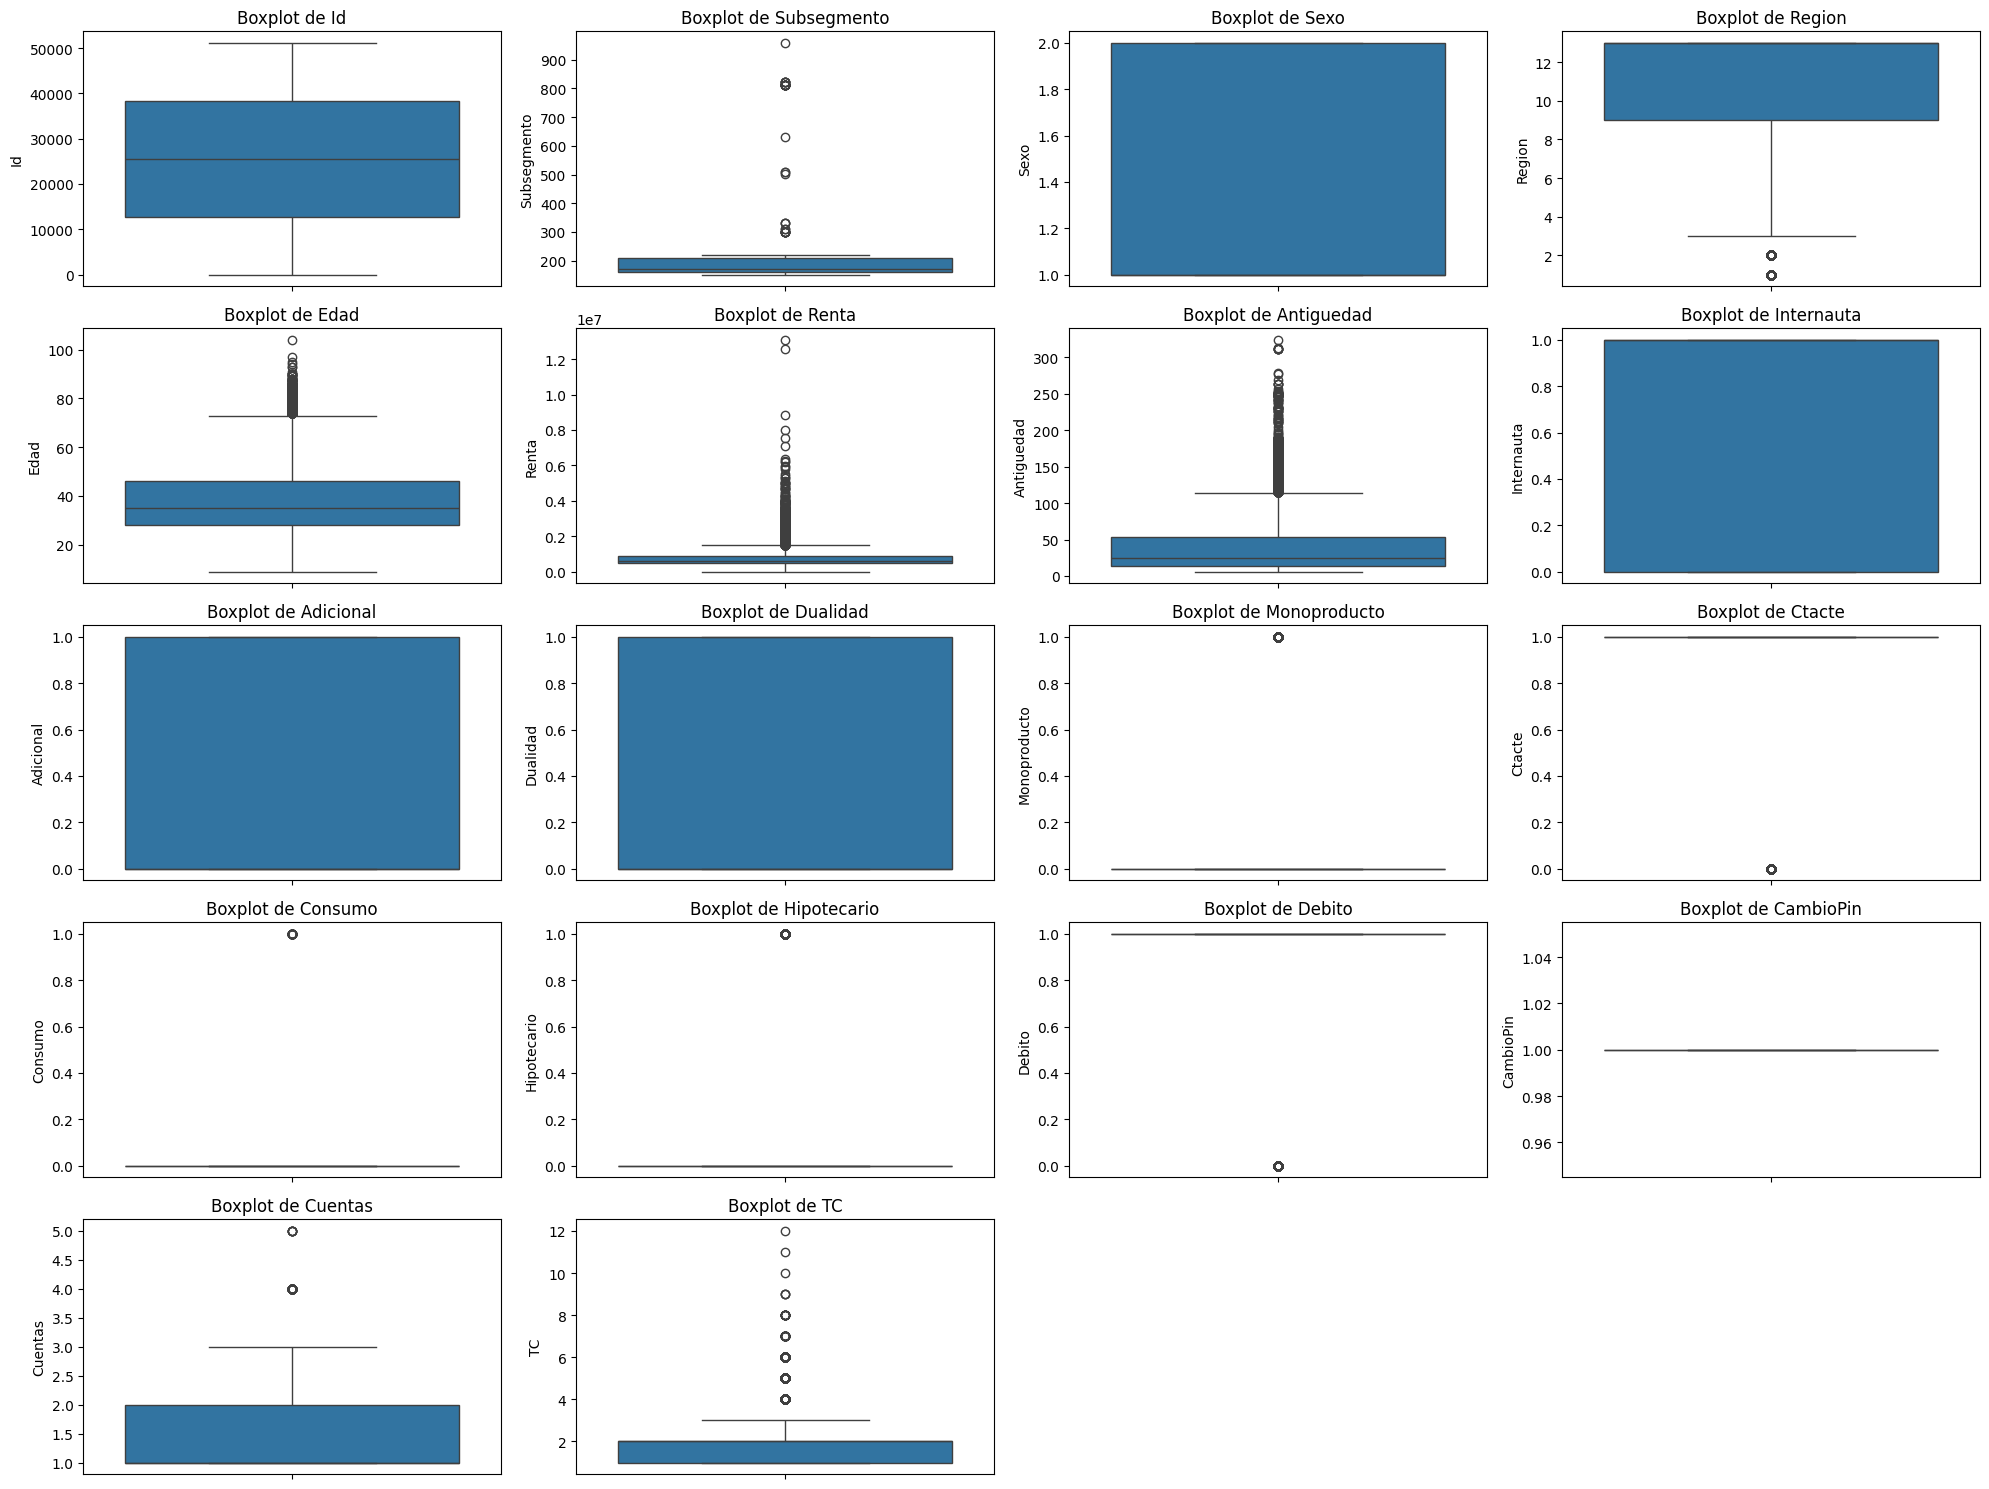

In [ ]:
#El siguiente código nos permite ver una gráfica de boxplot, esta gráfica es necesaria con el fin de poder encontrar datos con valores excesivos, estos datos deben ser reemplazados para poder se manejados de mejor manera.
# Definir las columnas que se desean graficar
columns_to_plot = ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta',
                   'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito',
                   'CambioPin', 'Cuentas', 'TC']
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)
    sb.boxplot(data=df_imputed[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

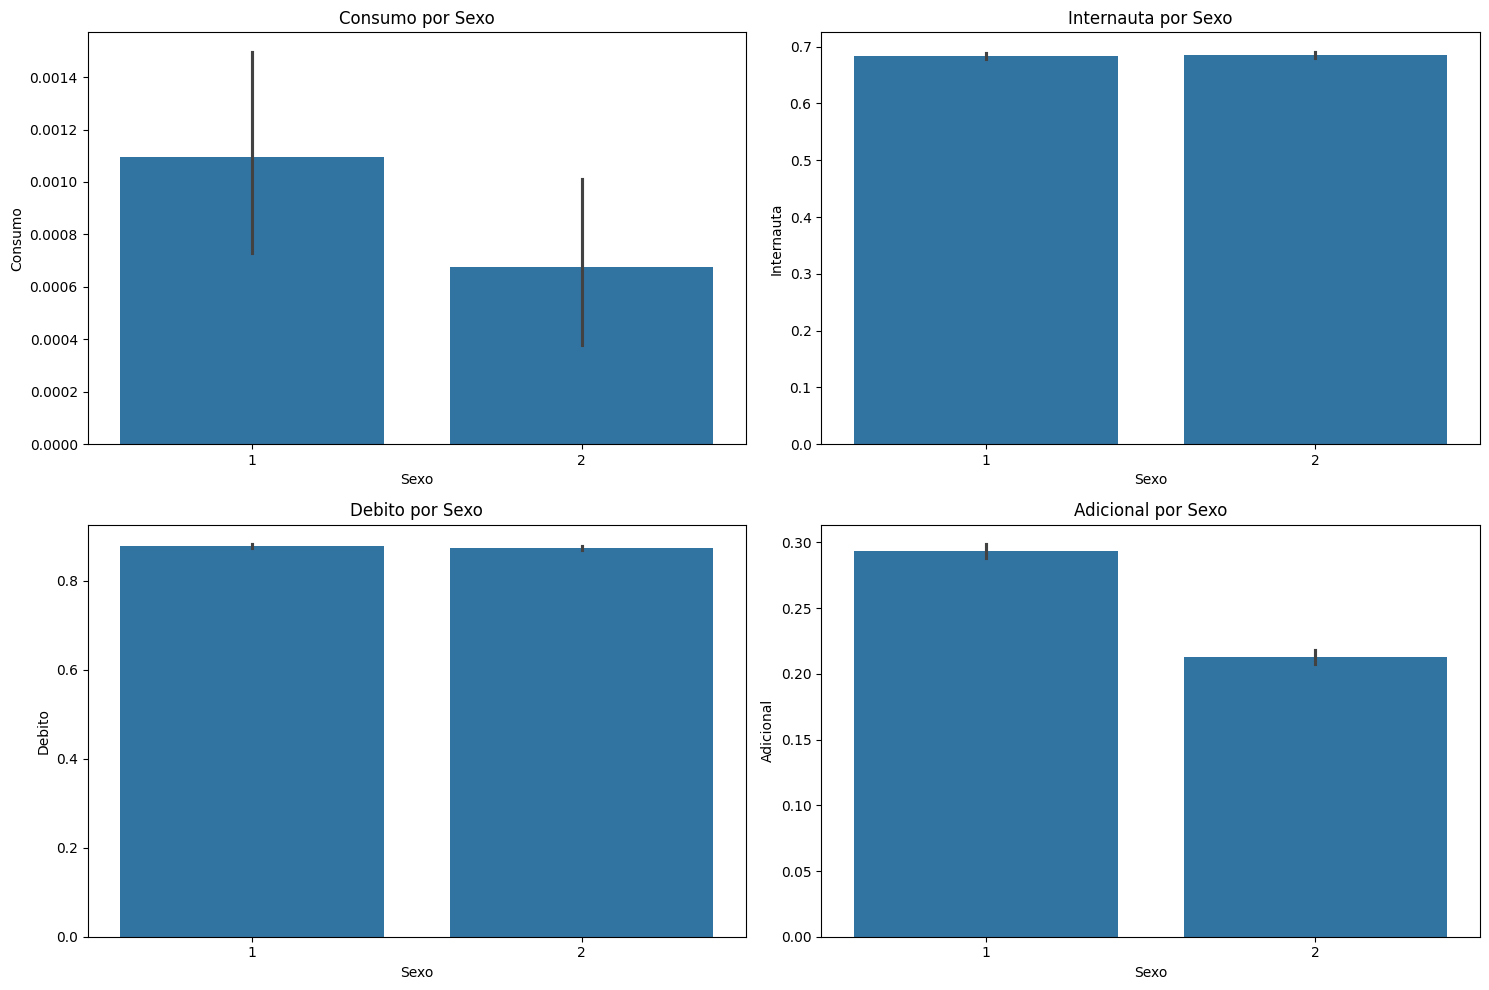

In [ ]:
# Crear un gráfico de barras para la relación entre Sexo y otras variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sb.barplot(x='Sexo', y='Consumo', data=df_imputed, ax=axes[0, 0])
sb.barplot(x='Sexo', y='Internauta', data=df_imputed, ax=axes[0, 1])
sb.barplot(x='Sexo', y='Debito', data=df_imputed, ax=axes[1, 0])
sb.barplot(x='Sexo', y='Adicional', data=df_imputed, ax=axes[1, 1])

axes[0, 0].set_title('Consumo por Sexo')
axes[0, 1].set_title('Internauta por Sexo')
axes[1, 0].set_title('Debito por Sexo')
axes[1, 1].set_title('Adicional por Sexo')

plt.tight_layout()
plt.show()

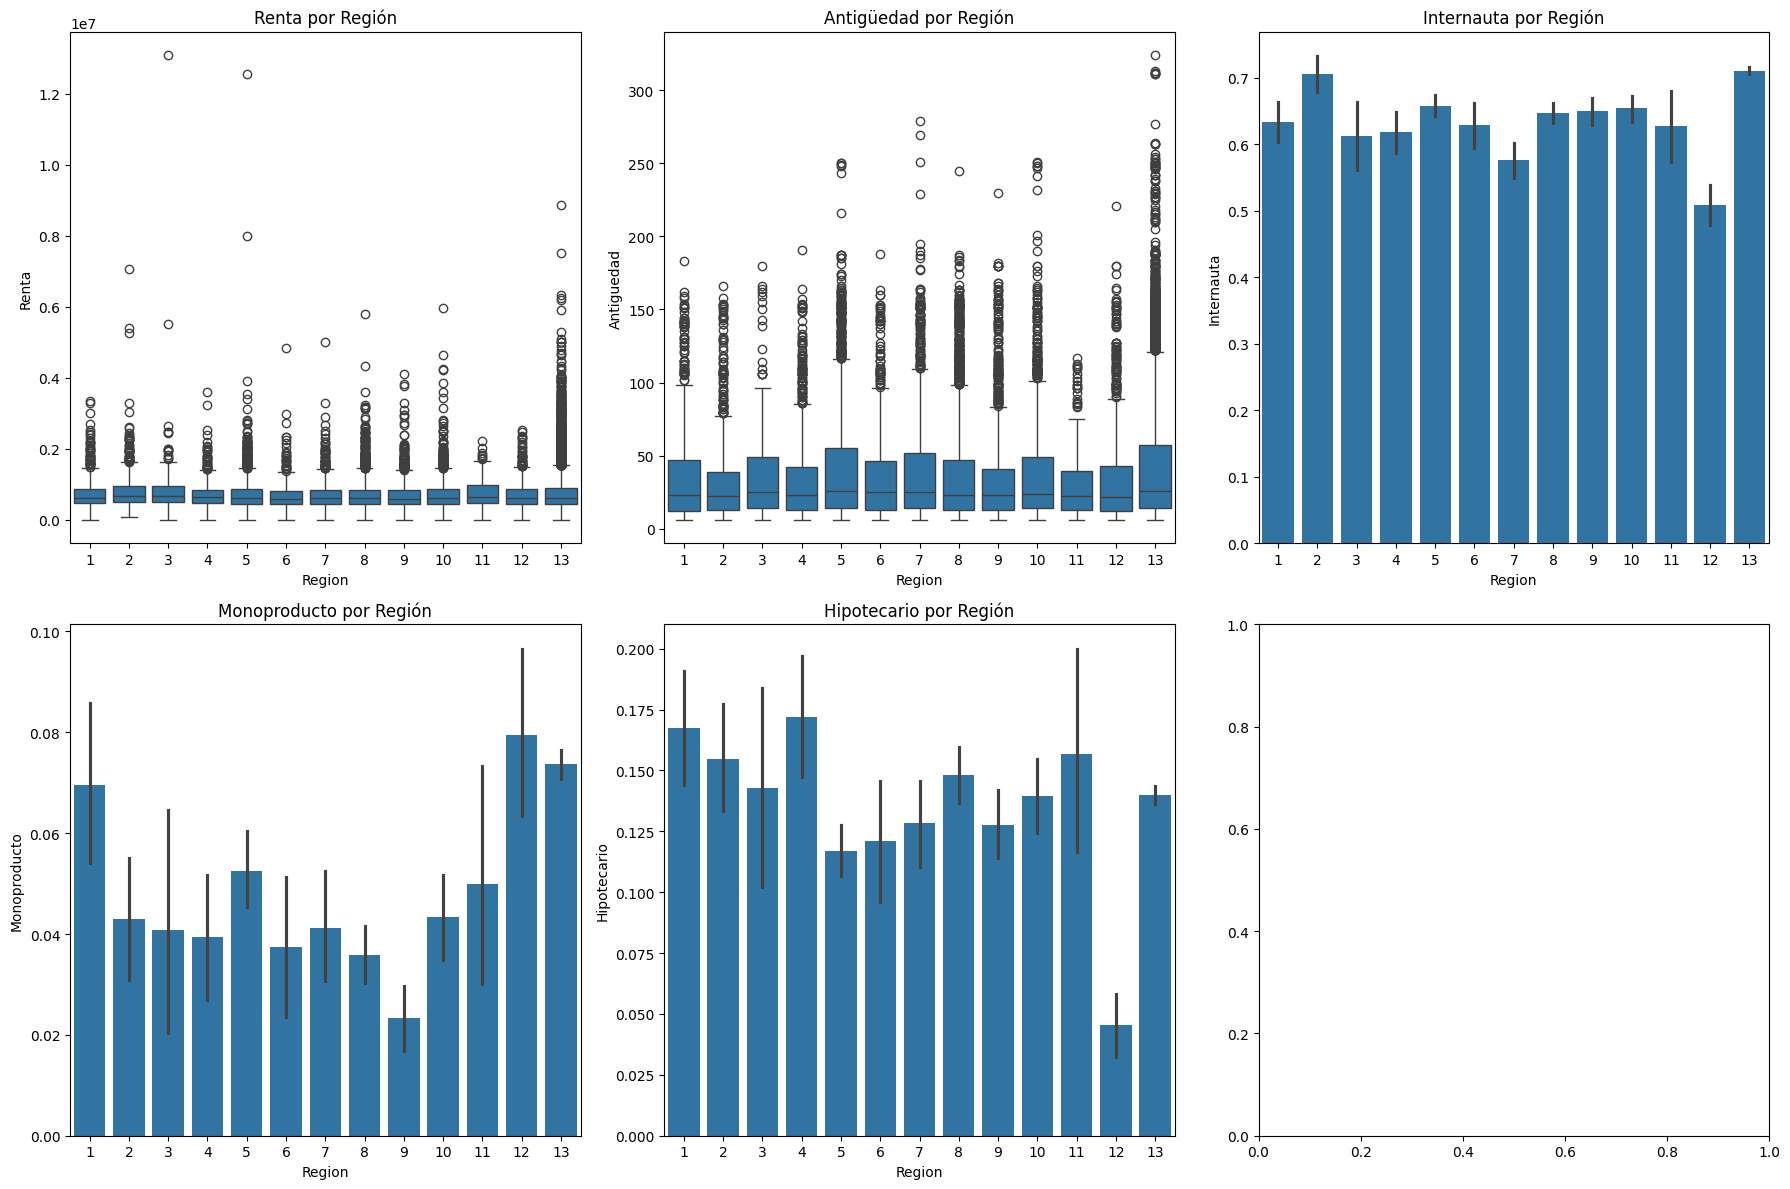

In [ ]:
# Crear un gráfico de cajas para la relación entre Región y otras variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sb.boxplot(x='Region', y='Renta', data=df_imputed, ax=axes[0, 0])
sb.boxplot(x='Region', y='Antiguedad', data=df_imputed, ax=axes[0, 1])
sb.barplot(x='Region', y='Internauta', data=df_imputed, ax=axes[0, 2])
sb.barplot(x='Region', y='Monoproducto', data=df_imputed, ax=axes[1, 0])
sb.barplot(x='Region', y='Hipotecario', data=df_imputed, ax=axes[1, 1])

axes[0, 0].set_title('Renta por Región')
axes[0, 1].set_title('Antigüedad por Región')
axes[0, 2].set_title('Internauta por Región')
axes[1, 0].set_title('Monoproducto por Región')
axes[1, 1].set_title('Hipotecario por Región')

plt.tight_layout()
plt.show()

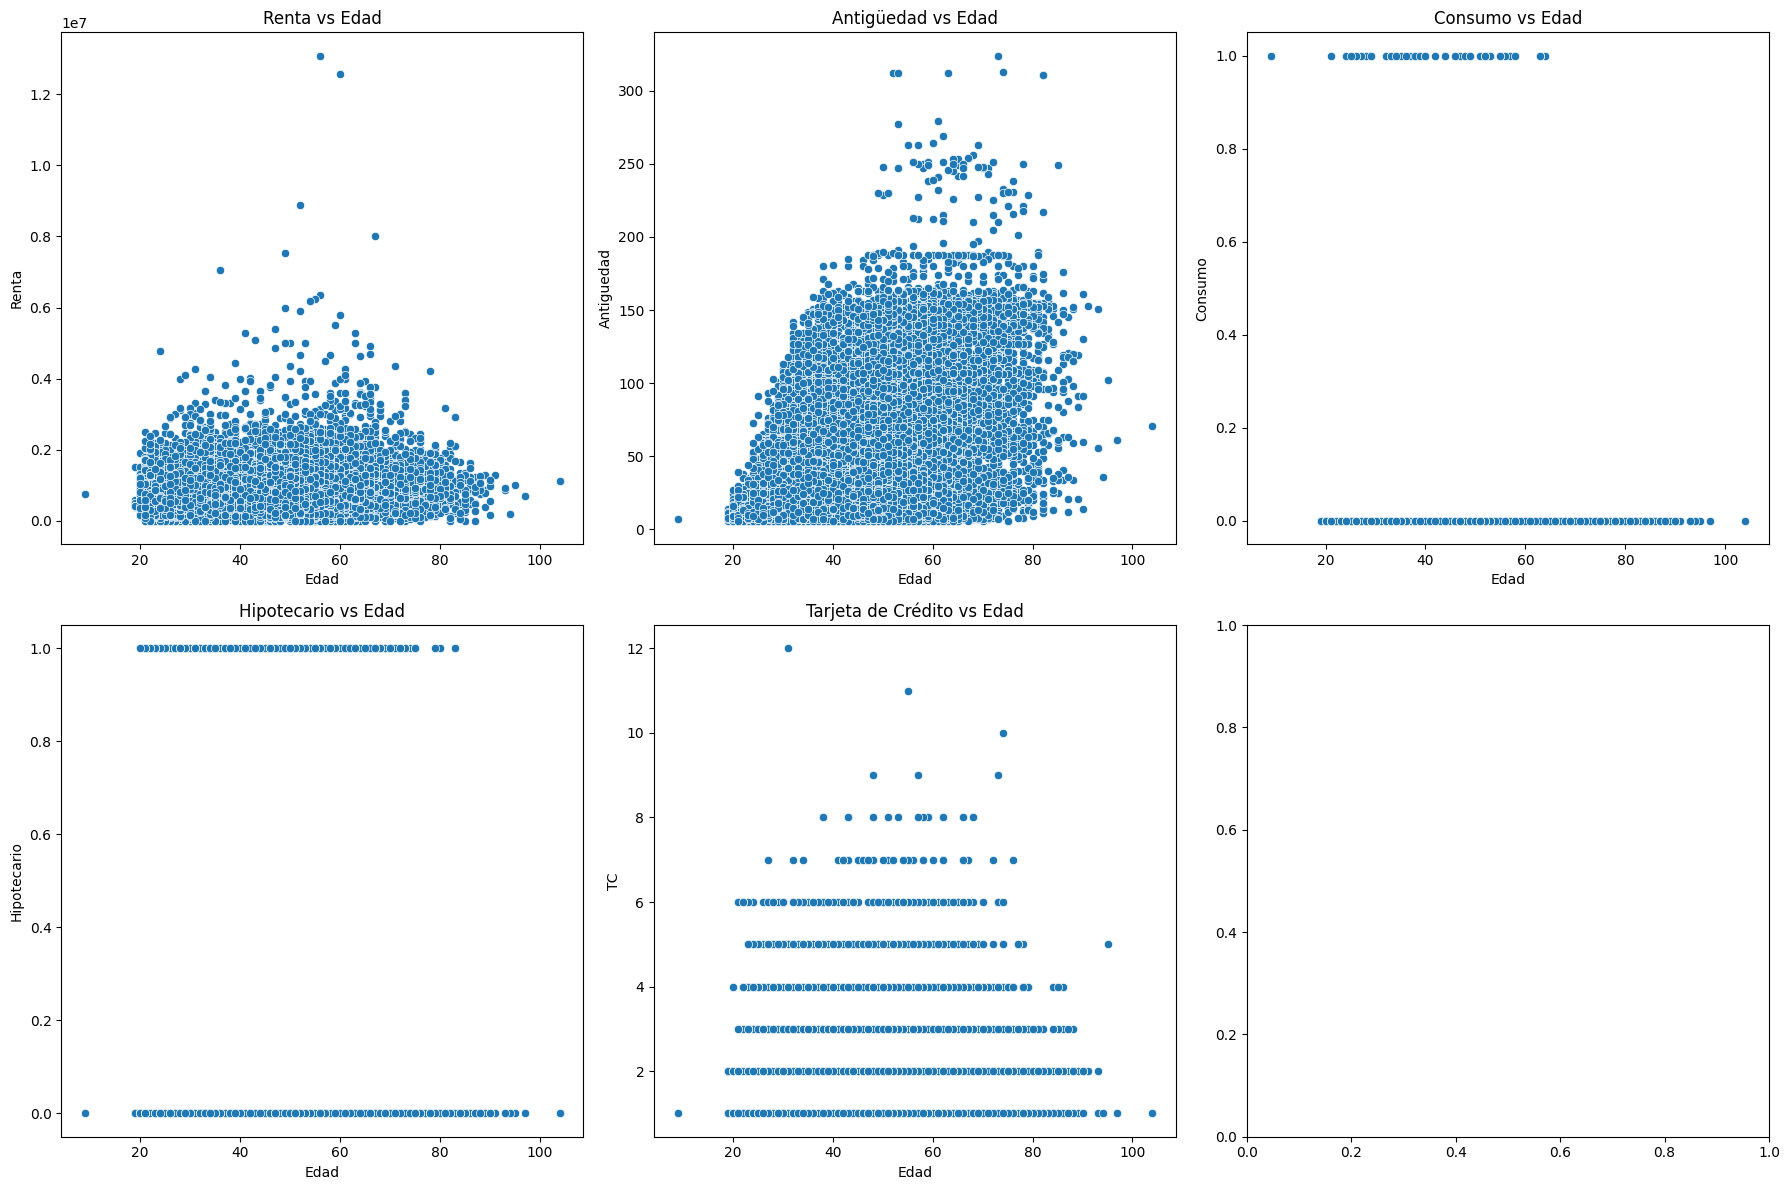

In [ ]:
# Crear gráficos de dispersión para analizar la relación entre Edad y otras variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sb.scatterplot(x='Edad', y='Renta', data=df_imputed, ax=axes[0, 0])
sb.scatterplot(x='Edad', y='Antiguedad', data=df_imputed, ax=axes[0, 1])
sb.scatterplot(x='Edad', y='Consumo', data=df_imputed, ax=axes[0, 2])
sb.scatterplot(x='Edad', y='Hipotecario', data=df_imputed, ax=axes[1, 0])
sb.scatterplot(x='Edad', y='TC', data=df_imputed, ax=axes[1, 1])

axes[0, 0].set_title('Renta vs Edad')
axes[0, 1].set_title('Antigüedad vs Edad')
axes[0, 2].set_title('Consumo vs Edad')
axes[1, 0].set_title('Hipotecario vs Edad')
axes[1, 1].set_title('Tarjeta de Crédito vs Edad')

plt.tight_layout()
plt.show()

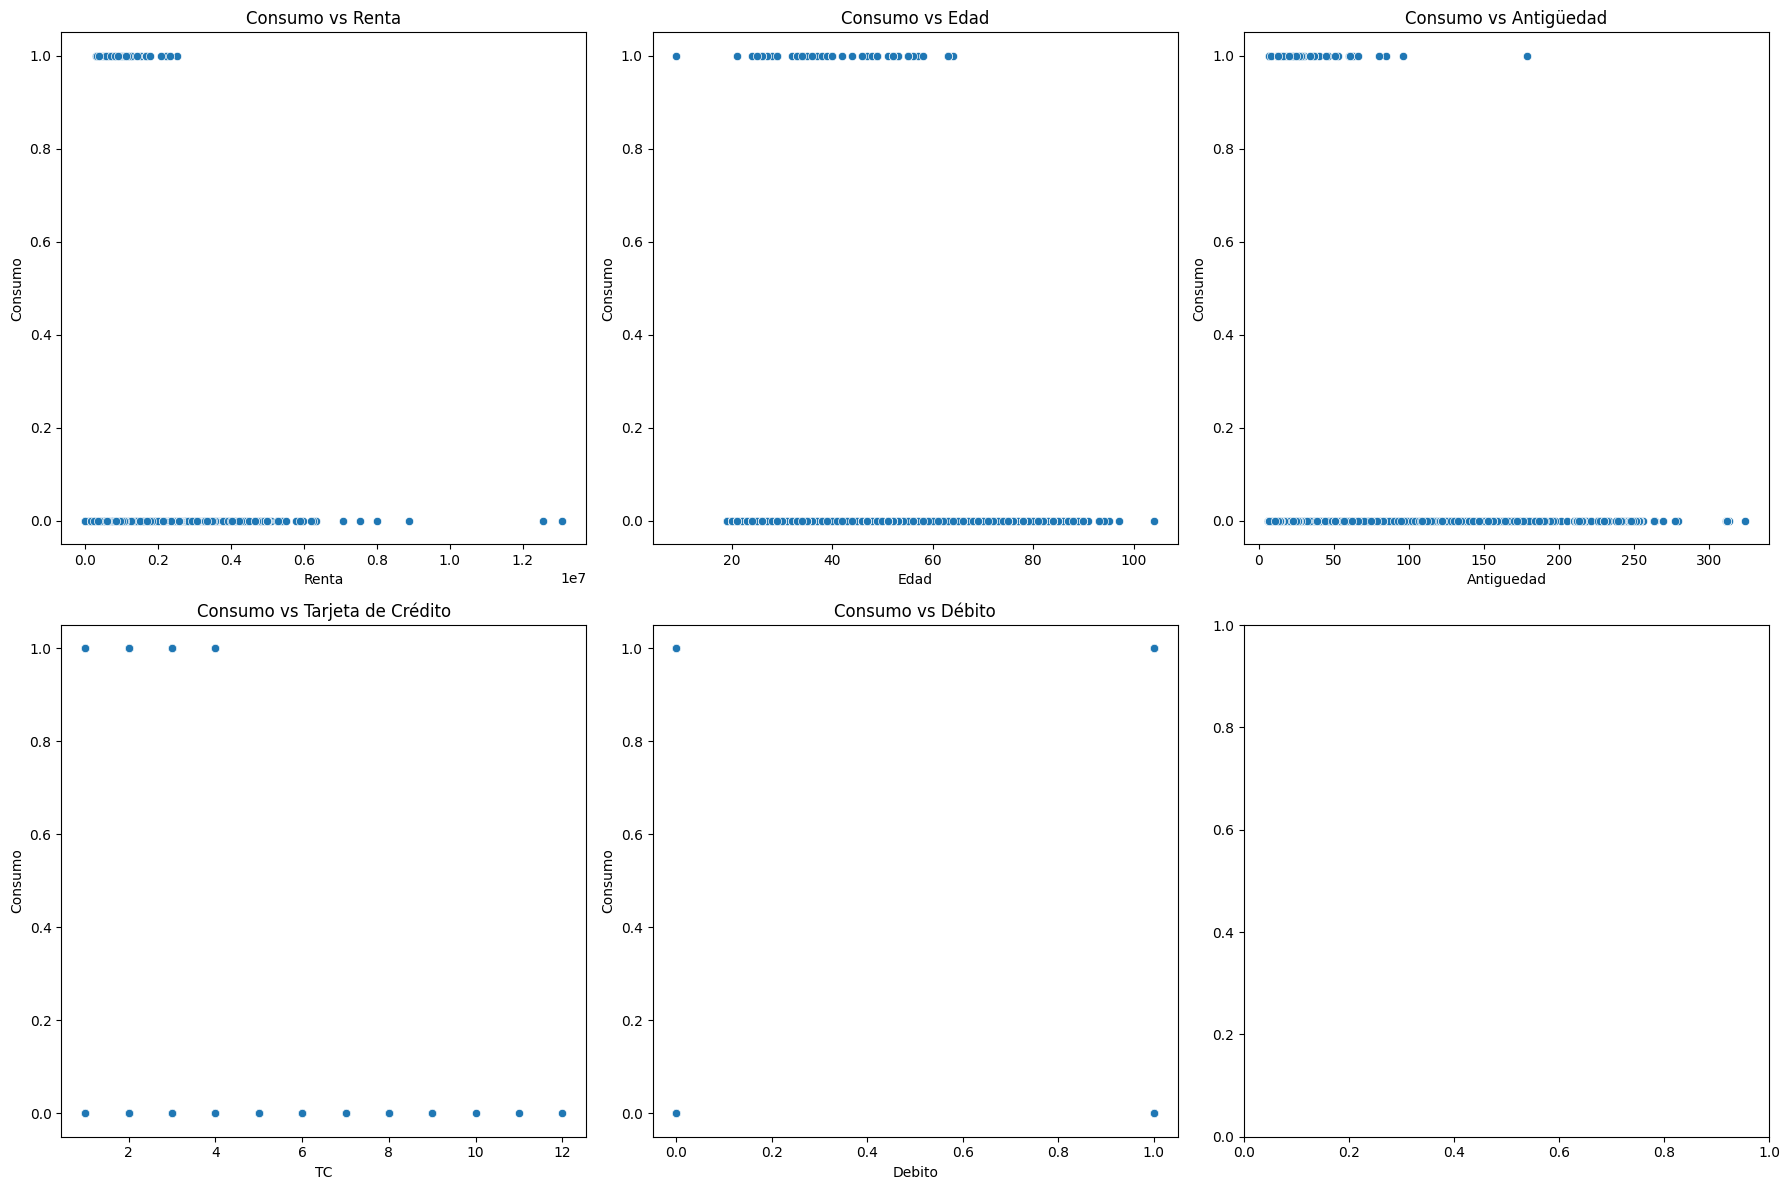

In [ ]:
# Crear gráficos de dispersión para analizar la relación entre Consumo y otras variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sb.scatterplot(x='Renta', y='Consumo', data=df_imputed, ax=axes[0, 0])
sb.scatterplot(x='Edad', y='Consumo', data=df_imputed, ax=axes[0, 1])
sb.scatterplot(x='Antiguedad', y='Consumo', data=df_imputed, ax=axes[0, 2])
sb.scatterplot(x='TC', y='Consumo', data=df_imputed, ax=axes[1, 0])
sb.scatterplot(x='Debito', y='Consumo', data=df_imputed, ax=axes[1, 1])

axes[0, 0].set_title('Consumo vs Renta')
axes[0, 1].set_title('Consumo vs Edad')
axes[0, 2].set_title('Consumo vs Antigüedad')
axes[1, 0].set_title('Consumo vs Tarjeta de Crédito')
axes[1, 1].set_title('Consumo vs Débito')

plt.tight_layout()
plt.show()

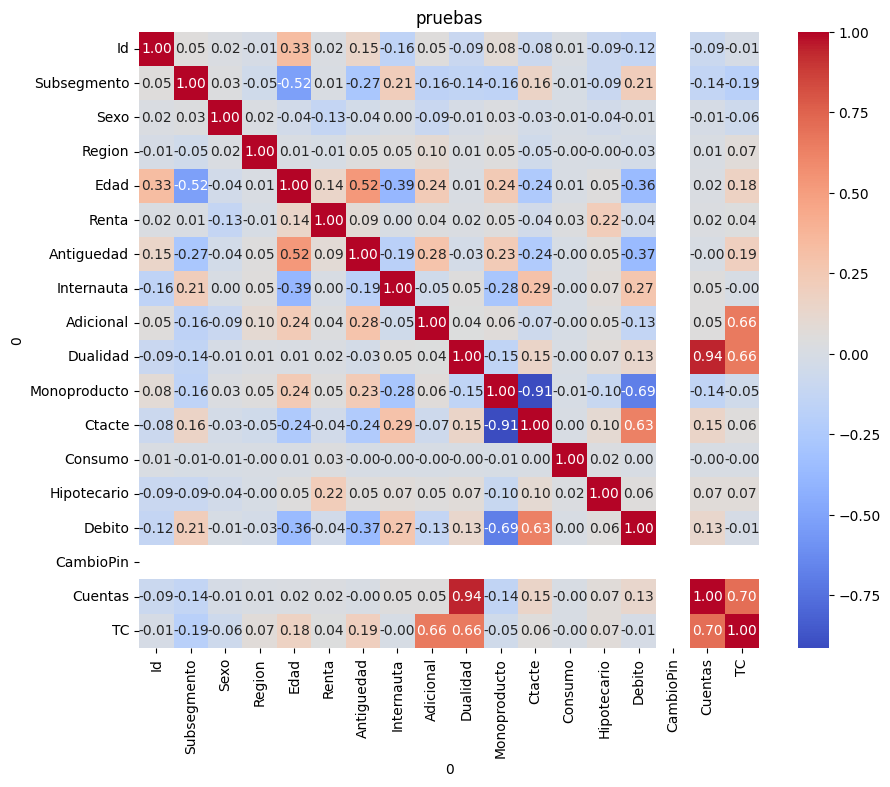

In [ ]:
# este codigo no esta listo //// acuerdate de adaptar el codigo con las columnas correctas
selected_columns = ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC']
df_selected = df[selected_columns]
df_encoded = pd.get_dummies(df_selected)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('pruebas')
plt.show()